# Principal Component Analysis

Unsupervised learning algorithm, that is just a transformation of your data and attempts to find out what features explain the most variance in your data.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## The Data

Let's work with the cancer data set since it had so many features.

In [53]:
from sklearn.datasets import load_breast_cancer

In [54]:
cancer = load_breast_cancer()

In [55]:
type(cancer)

sklearn.utils.Bunch

In [56]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
#print(cancer['data'])

In [58]:
#print(cancer['feature_names'])

In [59]:
# print(cancer['DESCR'])

In [60]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])


In [61]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
y = cancer['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [63]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
pca.fit(X_scaled)

PCA(n_components=2)

In [67]:
X_scaled.shape

(569, 30)

Now we can transform this data to its first 2 principal components.

In [68]:
x_pca = pca.transform(X_scaled)

In [69]:
x_pca.shape

(569, 2)

In [70]:
pca.n_components

2

In [71]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [72]:
pd.DataFrame(x_pca, columns = ['PCA1', 'PCA2']).head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'PCA2')

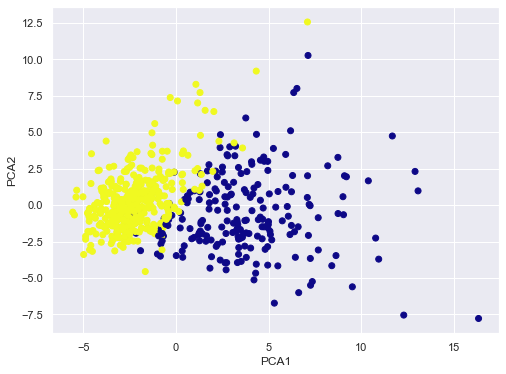

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [74]:
X=x_pca
y = cancer['target']


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

#DecisionTreeModel

In [78]:
%%time
DecisionTreeModel.fit(X_train, y_train)  # Training input and its Target variables

Wall time: 3 ms


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [79]:
%%time
DT_Pred = DecisionTreeModel.predict(X_test) # I already Know y_test  # 200 variables 

Wall time: 1 ms


In [80]:
pred_test = pd.DataFrame({"prediction":DT_Pred,"Actual":y_test})
pred_test

,prediction,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
109,0,0
110,1,1
111,0,0
112,0,0


In [81]:
DT_Pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

In [82]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

### Making the Confusion Matrix
**Accuracy** is perhaps the most intuitive performance measure. It is simply the ratio of correctly predicted observations.  
**Precision**: Precision looks at the ratio of correct positive observations   
**Recall** : Recall is also known as sensitivity or true positive rate. It is the ratio of correctly predicted positive events   
**F1 Score** : The F1 Score is the weighted average of Precision and recall. Therefore, this score takes both false postives and false negatives into account   

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
dt_cm = confusion_matrix(y_test,DT_Pred)
dt_cm

array([[45,  2],
       [ 6, 61]], dtype=int64)

In [85]:
target_names = ["negative", "positive"]
print(classification_report(y_test, DT_Pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      0.96      0.92        47
    positive       0.97      0.91      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# validate the data using test data

In [86]:
print(f"Training Data Score: {DecisionTreeModel.score(X_train, y_train)}")
print(f"Testing Data Score: {DecisionTreeModel.score(X_test, y_test)}")

Training Data Score: 0.9648351648351648
Testing Data Score: 0.9298245614035088


Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [87]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [88]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

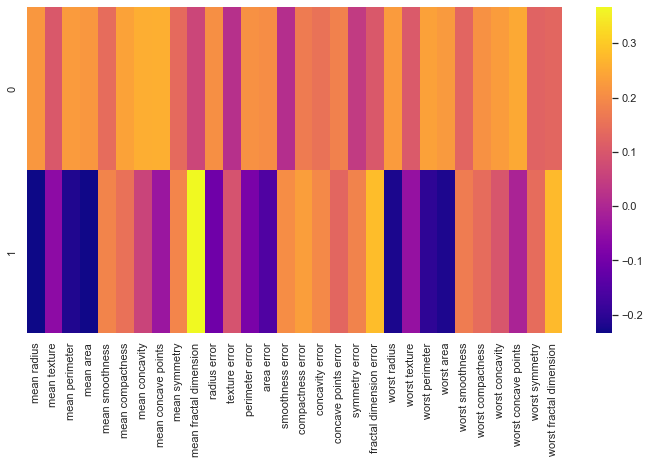

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

PCA has no concern with the class labels. It summarizes the feature set without considering the output. PCA tries to find the directions of the maximum variance in the dataset. In a high cardinality feature set, there are possibilities of duplicate features which would add redundancy to the dataset, increase the computation cost and add unneccessary model complexity. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features.

### feature imporatant

In [133]:
# # Correlation with Target Variable

#  X.corr().abs()


# plt.figure(figsize=(30,20))
# X.corr()['target'].plot()

In [134]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
y = cancer['target']

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
DecisionTreeModel.fit(X_train, y_train)
### Verification:
results = pd.DataFrame(index= X_train.columns, data={'importance':DecisionTreeModel.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
                         importance
mean radius                0.000000
mean texture               0.023383
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.027877
mean compactness           0.000000
mean concavity             0.000000
mean concave points        0.000000
mean symmetry              0.024142
mean fractal dimension     0.000000
radius error               0.000000
texture error              0.000000
perimeter error            0.000000
area error                 0.021716
smoothness error           0.000000
compactness error          0.000000
concavity error            0.000000
concave points error       0.000000
symmetry error             0.022400
fractal dimension error    0.000000
worst radius               0.000000
worst texture              0.046077
worst perimeter            0.201043
worst area                 0.000000
worst smoothness           0.000000
worst compactness          0.000000
worst c

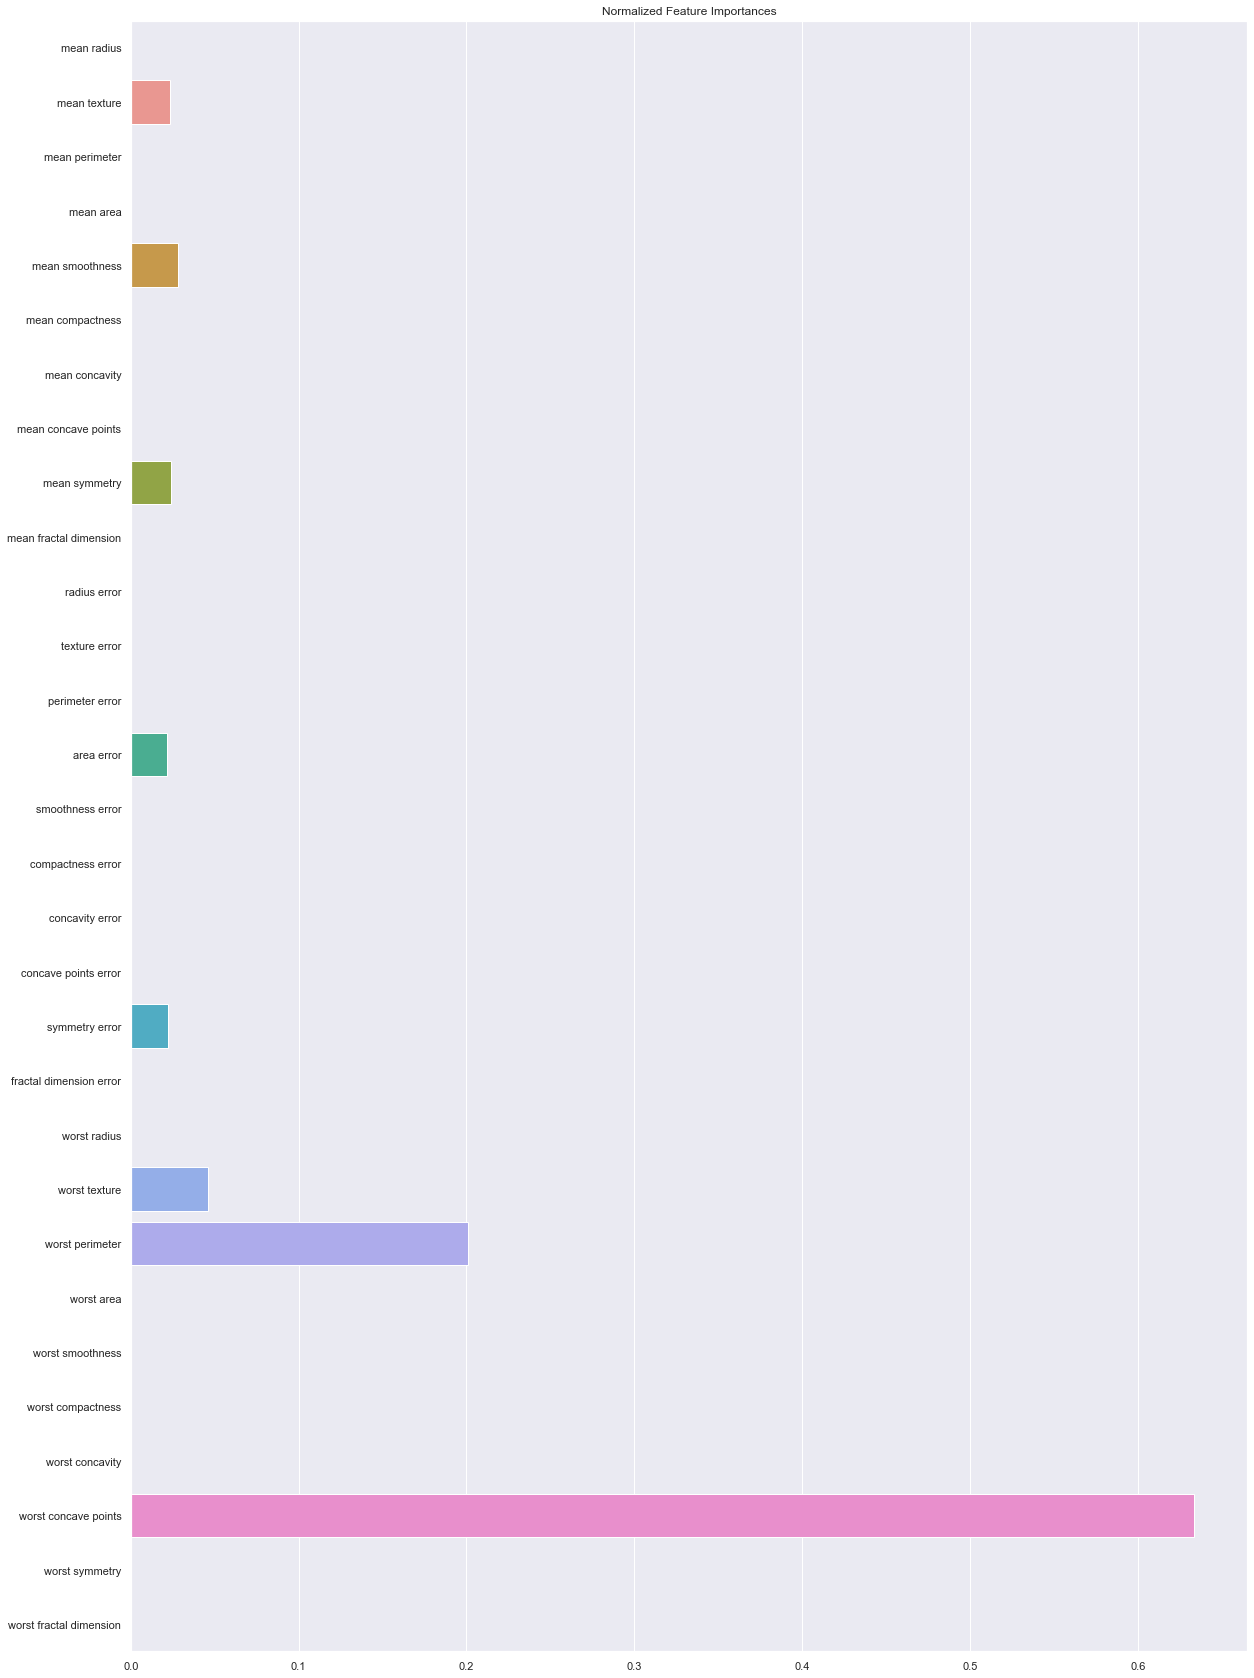

In [137]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 20,30
plt.title('Normalized Feature Importances')
sns.barplot(x = DecisionTreeModel.feature_importances_, y =X_train.columns, orient = 'h')
plt.show()

In [141]:
feature_importances = pd.DataFrame({'Importance Coef' :DecisionTreeModel.feature_importances_ , 'Features' : X_train.columns})
feature_importances.nlargest(15, 'Importance Coef')

,Importance Coef,Features
27,0.633361,worst concave points
22,0.201043,worst perimeter
21,0.046077,worst texture
4,0.027877,mean smoothness
8,0.024142,mean symmetry
1,0.023383,mean texture
18,0.022400,symmetry error
13,0.021716,area error
0,0.000000,mean radius
2,0.000000,mean perimeter


In [143]:
features = feature_importances.nlargest(8, 'Importance Coef')

features =[x for x in features['Features'] if x!=0]
features

['worst concave points',
 'worst perimeter',
 'worst texture',
 'mean smoothness',
 'mean symmetry',
 'mean texture',
 'symmetry error',
 'area error']

In [140]:
df_2= X[['worst concave points',
 'worst perimeter',
 'worst texture',
 'mean smoothness',
 'mean symmetry',
 'mean texture',
 'symmetry error',
 'area error']]

In [150]:
# pip install xgboost

In [154]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(15,5))

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<Figure size 1080x360 with 0 Axes>

In [155]:
# feature importance
print(model.feature_importances_)

[0.07469867 0.01344847 0.         0.03087107 0.01074023 0.00420738
 0.00500765 0.21094    0.01592404 0.00047864 0.0262644  0.0041925
 0.         0.01144557 0.01006694 0.00493801 0.         0.00053982
 0.00487137 0.0073497  0.01344967 0.01777423 0.07667678 0.05610785
 0.009681   0.00375145 0.02719878 0.35330954 0.00204486 0.0040214 ]


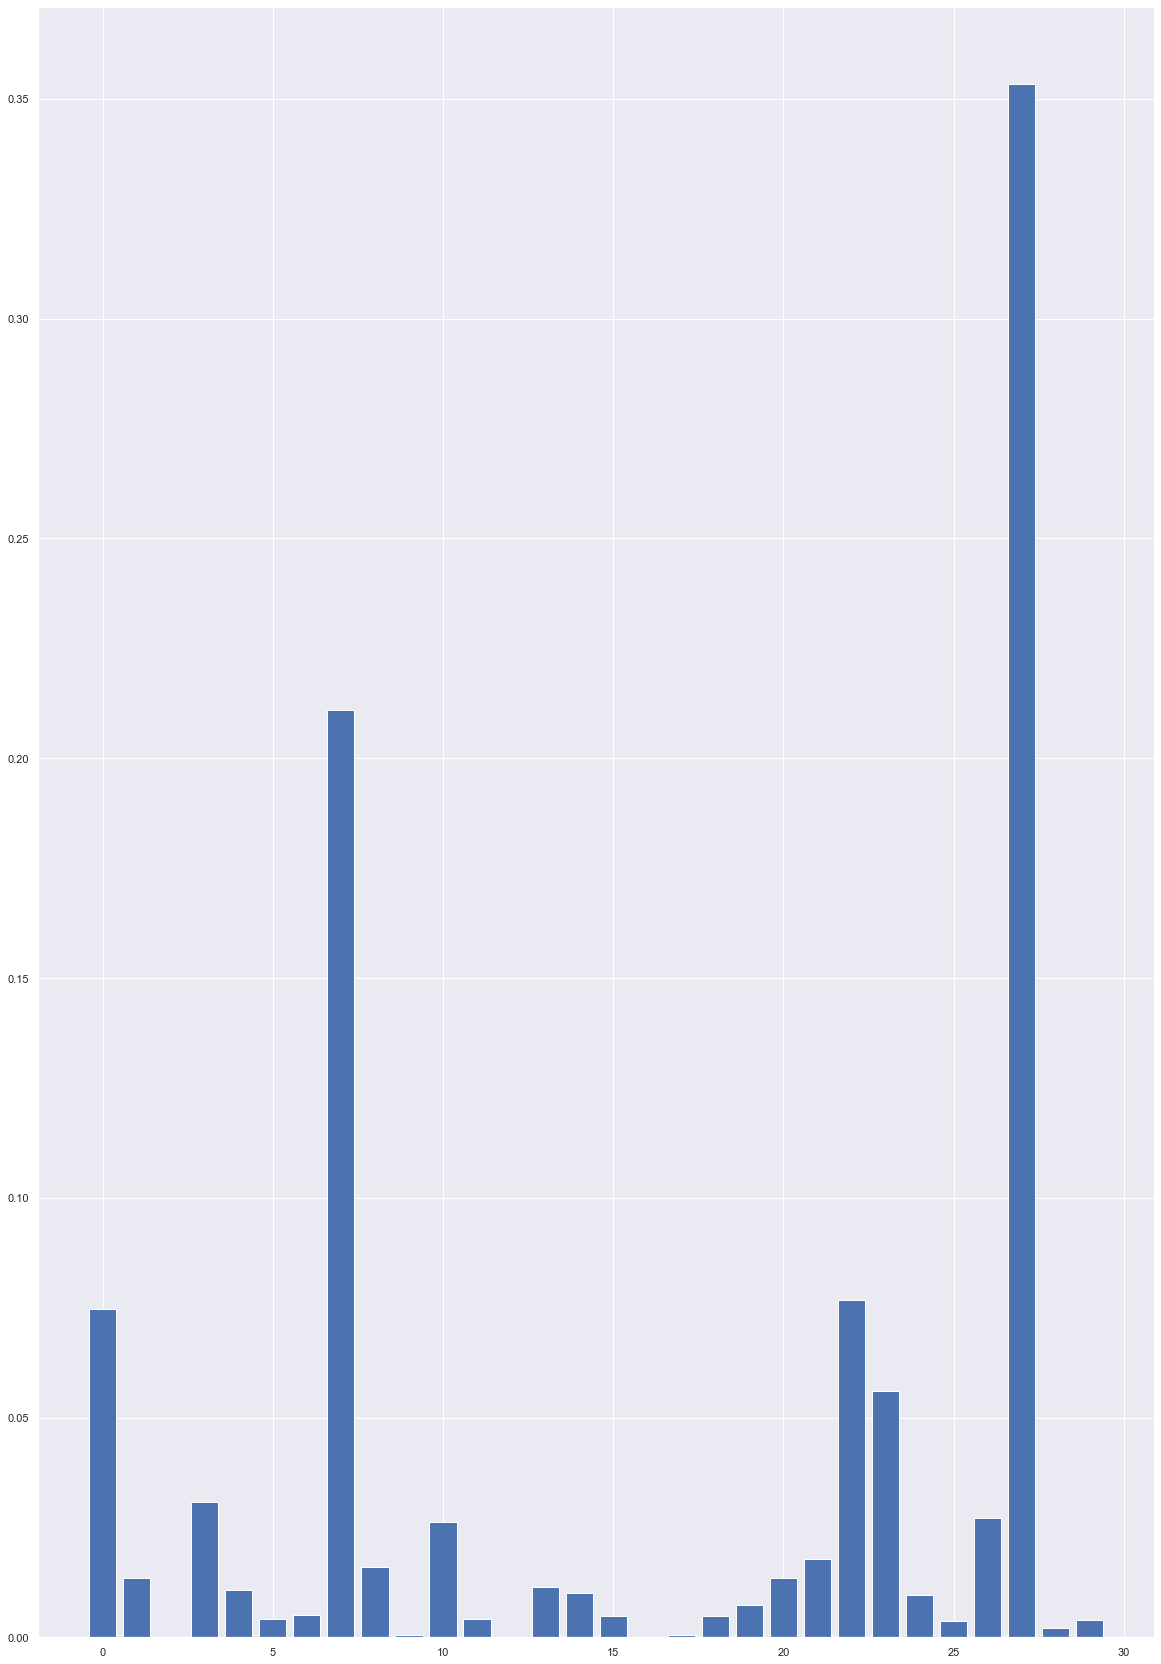

In [156]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [164]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : X_train.columns})
feature_importances.nlargest(30, 'Importance Coef')

,Importance Coef,Features
27,0.353310,worst concave points
7,0.210940,mean concave points
22,0.076677,worst perimeter
0,0.074699,mean radius
23,0.056108,worst area
3,0.030871,mean area
26,0.027199,worst concavity
10,0.026264,radius error
21,0.017774,worst texture
8,0.015924,mean symmetry


In [165]:
features = feature_importances.nlargest(15, 'Importance Coef')

In [161]:
features

,Importance Coef,Features
27,0.633361,worst concave points
22,0.201043,worst perimeter
21,0.046077,worst texture
4,0.027877,mean smoothness
8,0.024142,mean symmetry
1,0.023383,mean texture
18,0.022400,symmetry error
13,0.021716,area error
0,0.000000,mean radius
2,0.000000,mean perimeter


In [162]:
'''# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print ()"Num Features: %d" % fit.n_features_
print("Selected Features: %s") % fit.support_)
print("Feature Ranking: %s") % fit.ranking_

SyntaxError: EOF while scanning triple-quoted string literal (2839279580.py, line 15)

# Kpca

In [300]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
kpca.fit(X)

KernelPCA(kernel='rbf', n_components=2)

In [301]:
kpca = kpca.transform(X)

In [302]:
kpca

array([[-0.00290973, -0.00305362],
       [-0.00291059, -0.00305461],
       [-0.00290973, -0.00305362],
       ...,
       [-0.00290973, -0.00305362],
       [-0.00290973, -0.00305362],
       [-0.00290973, -0.00305363]])

In [303]:
pd.DataFrame(kpca, columns = ['principal component 1', 'principal component 2']).head()

,principal component 1,principal component 2
0,-0.002910,-0.003054
1,-0.002911,-0.003055
2,-0.002910,-0.003054
3,-0.002910,-0.003054
4,-0.002910,-0.003054


Text(0, 0.5, 'principal component 2')

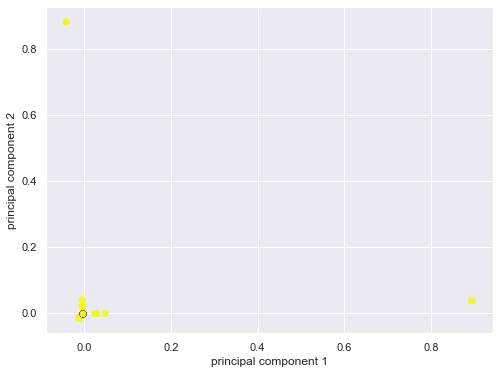

In [304]:
plt.figure(figsize=(8,6))
plt.scatter(kpca[:,0],kpca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [305]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda= lda.fit_transform(X,y)


In [306]:
lda.explained_variance_ratio_

array([1.])

In [307]:
lda= pd.DataFrame(X_lda, columns=['LDA']).head()
lda

,LDA
0,3.323927
1,2.319108
2,3.747425
3,4.048549
4,2.281158


LDA tries to reduce the dimensionality by taking into consideration the information that discriminates the output classes. LDA tries to find the decision boundary around each cluster of class.

It projects the data points to new dimension in a way that the clusters are as seperate from each other as possible and individual elements within a class are as close to the centroid as possible.

